In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import ipywidgets as widgets  # Import ipywidgets for the dropdown and button
from IPython.display import display, clear_output

In [2]:
dish_cuisine_df = pd.read_excel(r"C:\Users\bhava\Downloads\Dish-Cuisine Mapping.xlsx")
restaurants_data_df = pd.read_csv(r"C:\Users\bhava\Downloads\Restaurants Data (1).csv")
survey_data_normalized_df = pd.read_csv(r"C:\Users\bhava\Downloads\Survey Data Normalized (1).csv")

In [3]:
dish_cuisine_df

,Type,Name,Ingredients,Veg/Non-Veg?,Allergens?
0,South Indian,Chicken Biryani,"Spice, Vegetable, Meat, Yoghurt, Dried Fruit, ...",Non-Vegetarian,Eggs
1,South Indian,Masala Dosa,"Potato, Parbolied rice, Urad dal",Vegetarian,NaN
2,South Indian,Hyderabadi haleem,"Ghee, Goat meat, Dried Fruit, Pounded wheat, S...",Non-Vegetarian,Wheat
3,South Indian,Bisi bele bath,"Vegetable, Asafoetida, Curry tree, Pigeon pea,...",Vegetarian,NaN
4,South Indian,Vada,"Chili pepper, Curry tree, Onions, Lentils",Vegetarian,NaN
...,...,...,...,...,...
100,Beverages & Desserts,Irish Coffee,"sugar, coffee, heavy cream, Milk",Vegetarian,Milk
101,Beverages & Desserts,Shahi Tukda,"almonds, green unsalted pistachio, bread slice...",Vegetarian,Milk
102,Beverages & Desserts,Chocolate Lava Cake,"dark chocolate, butter, icing sugar, egg yolks...",Non-Vegetarian,Eggs
103,Beverages & Desserts,Vanilla Ice Cream,"Milk, Sugar, Milk Powder, Hot Milk, Vanilla Es...",Vegetarian,Milk


In [4]:
restaurants_data_df

,Location,Dish,Restaurant Name,Cuisine,Rating,Delivery_Time,Cost_for_two,Order_URL
0,"Banglore, Karnataka, India",Chicken Biryani,Nagarjuna,"Andhra, South Indian",4.4,26 MINS,600,https://www.swiggy.com/restaurants/nagarjuna-r...
1,"Banglore, Karnataka, India",Chicken Biryani,New Taj Darbar,North Indian,3.8,29 MINS,300,https://www.swiggy.com/restaurants/new-taj-dar...
2,"Banglore, Karnataka, India",Chicken Biryani,Bheemas,Andhra,4.4,33 MINS,550,https://www.swiggy.com/restaurants/bheemas-chu...
3,"Banglore, Karnataka, India",Chicken Biryani,Hamza hotel,"Continental, Fast Food, Street Food",4.2,26 MINS,300,https://www.swiggy.com/restaurants/hamza-hotel...
4,"Banglore, Karnataka, India",Chicken Biryani,Hyderabad Biriyani House,"Biryani, Chinese, Hyderabadi, Andhra, Fast Food",4.3,34 MINS,500,https://www.swiggy.com/restaurants/hyderabad-b...
...,...,...,...,...,...,...,...,...
28481,"Kolkata, West Bengal, India",Milk Shake,Kathi On The Go,"Biryani, Indian, Kebabs, Mughlai, Fast Food",3.8,69 MINS,300,https://www.swiggy.com/restaurants/kathi-on-th...
28482,"Kolkata, West Bengal, India",Milk Shake,Apu's Kitchen Phool Bagan,"Indian, Chinese",4.3,50 MINS,300,https://www.swiggy.com/restaurants/apus-kitche...
28483,"Kolkata, West Bengal, India",Milk Shake,Sabita Restaurant,"North Indian, Chinese, Bengali, Biryani, India...",4.1,72 MINS,300,https://www.swiggy.com/restaurants/sabita-rest...
28484,"Kolkata, West Bengal, India",Milk Shake,Royal India Restaurant,"Biryani, Chinese, Tandoor , indian, , North In...",4.2,69 MINS,300,https://www.swiggy.com/restaurants/royal-india...


In [5]:
survey_data_normalized_df

,RES_ID,LOC,GENDER,AGE,WEIGHT,FREQUENCY,PRICE,WAIT_TIME,FOOD_PREFERENCE,MOOD,DISH CHOSEN,CUISINE,INGREDIENTS,DISH TYPE,ALLERGENS
0,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Happy,litti chokha,North Indian,a baked salted wheat flour cake filled with sa...,Vegetarian,Wheat
1,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Happy,milk shake,Beverages & Desserts,"Milk, Sugar, Ice cream, Fruits",Vegetarian,Milk
2,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Hungry,garlic bread,Continental/Italian,"Mozzarella cheese,italian bread,garlic powder",Vegetarian,NaN
3,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Hungry,spaghetti,Continental/Italian,"Semolina or flour, water",Both,NaN
4,z2Dw8rOU,Hyderabad,Male,26-35,61-75,Every week,500-750,30-40 min,Non-Vegetarian,Depressed/Sad,kadai paneer,North Indian,Paneer and green peppers in tomato gravy,Vegetarian,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Hungry,kadu ki kheer,Beverages & Desserts,"Milk, rice, sugar, dried fruits",Vegetarian,Milk
4763,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Hungry,double ka meetha,Beverages & Desserts,"Loaf bread, milk, Ghee",Vegetarian,Milk
4764,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Hungry,masala chai,Beverages & Desserts,"water, ginger, cardamom seeds, tea leaves, mil...",Vegetarian,Milk
4765,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Workaholic,lassi,Beverages & Desserts,"Curd, Water, Sugar",Vegetarian,NaN


In [6]:
# Step 1: Data Preprocessing
dish_cuisine_df['Allergens?'].fillna('None', inplace=True)
survey_data_normalized_df['ALLERGENS'].fillna('None', inplace=True)

In [7]:
dish_cuisine_df

,Type,Name,Ingredients,Veg/Non-Veg?,Allergens?
0,South Indian,Chicken Biryani,"Spice, Vegetable, Meat, Yoghurt, Dried Fruit, ...",Non-Vegetarian,Eggs
1,South Indian,Masala Dosa,"Potato, Parbolied rice, Urad dal",Vegetarian,None
2,South Indian,Hyderabadi haleem,"Ghee, Goat meat, Dried Fruit, Pounded wheat, S...",Non-Vegetarian,Wheat
3,South Indian,Bisi bele bath,"Vegetable, Asafoetida, Curry tree, Pigeon pea,...",Vegetarian,None
4,South Indian,Vada,"Chili pepper, Curry tree, Onions, Lentils",Vegetarian,None
...,...,...,...,...,...
100,Beverages & Desserts,Irish Coffee,"sugar, coffee, heavy cream, Milk",Vegetarian,Milk
101,Beverages & Desserts,Shahi Tukda,"almonds, green unsalted pistachio, bread slice...",Vegetarian,Milk
102,Beverages & Desserts,Chocolate Lava Cake,"dark chocolate, butter, icing sugar, egg yolks...",Non-Vegetarian,Eggs
103,Beverages & Desserts,Vanilla Ice Cream,"Milk, Sugar, Milk Powder, Hot Milk, Vanilla Es...",Vegetarian,Milk


In [8]:
survey_data_normalized_df

,RES_ID,LOC,GENDER,AGE,WEIGHT,FREQUENCY,PRICE,WAIT_TIME,FOOD_PREFERENCE,MOOD,DISH CHOSEN,CUISINE,INGREDIENTS,DISH TYPE,ALLERGENS
0,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Happy,litti chokha,North Indian,a baked salted wheat flour cake filled with sa...,Vegetarian,Wheat
1,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Happy,milk shake,Beverages & Desserts,"Milk, Sugar, Ice cream, Fruits",Vegetarian,Milk
2,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Hungry,garlic bread,Continental/Italian,"Mozzarella cheese,italian bread,garlic powder",Vegetarian,None
3,k6DwKiyS,Mumbai,Male,36-45,61-75,Once in a month,500-750,20-30 min,Non-Vegetarian,Hungry,spaghetti,Continental/Italian,"Semolina or flour, water",Both,None
4,z2Dw8rOU,Hyderabad,Male,26-35,61-75,Every week,500-750,30-40 min,Non-Vegetarian,Depressed/Sad,kadai paneer,North Indian,Paneer and green peppers in tomato gravy,Vegetarian,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Hungry,kadu ki kheer,Beverages & Desserts,"Milk, rice, sugar, dried fruits",Vegetarian,Milk
4763,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Hungry,double ka meetha,Beverages & Desserts,"Loaf bread, milk, Ghee",Vegetarian,Milk
4764,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Hungry,masala chai,Beverages & Desserts,"water, ginger, cardamom seeds, tea leaves, mil...",Vegetarian,Milk
4765,w4DUF7dF,Hyderabad,Male,15-25,46-60,Alternate Week,250-500,Less than 20 min,Non-Vegetarian,Workaholic,lassi,Beverages & Desserts,"Curd, Water, Sugar",Vegetarian,None


In [9]:
# Encode categorical features
label_encoders = {}
for column in ['LOC', 'GENDER', 'AGE', 'WEIGHT', 'FREQUENCY', 'PRICE', 'WAIT_TIME', 'FOOD_PREFERENCE', 'MOOD', 'DISH CHOSEN', 'CUISINE', 'DISH TYPE', 'ALLERGENS']:
    le = LabelEncoder()
    survey_data_normalized_df[column] = le.fit_transform(survey_data_normalized_df[column])
    label_encoders[column] = le  # Store label encoders for later decoding

In [10]:
survey_data_normalized_df

,RES_ID,LOC,GENDER,AGE,WEIGHT,FREQUENCY,PRICE,WAIT_TIME,FOOD_PREFERENCE,MOOD,DISH CHOSEN,CUISINE,INGREDIENTS,DISH TYPE,ALLERGENS
0,k6DwKiyS,4,1,2,3,3,2,0,0,3,53,3,a baked salted wheat flour cake filled with sa...,2,6
1,k6DwKiyS,4,1,2,3,3,2,0,0,3,59,0,"Milk, Sugar, Ice cream, Fruits",2,2
2,k6DwKiyS,4,1,2,3,3,2,0,0,4,36,2,"Mozzarella cheese,italian bread,garlic powder",2,3
3,k6DwKiyS,4,1,2,3,3,2,0,0,4,85,2,"Semolina or flour, water",0,3
4,z2Dw8rOU,2,1,1,3,1,2,1,0,2,48,3,Paneer and green peppers in tomato gravy,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,w4DUF7dF,2,1,0,2,0,1,2,0,4,49,0,"Milk, rice, sugar, dried fruits",2,2
4763,w4DUF7dF,2,1,0,2,0,1,2,0,4,31,0,"Loaf bread, milk, Ghee",2,2
4764,w4DUF7dF,2,1,0,2,0,1,2,0,4,57,0,"water, ginger, cardamom seeds, tea leaves, mil...",2,2
4765,w4DUF7dF,2,1,0,2,0,1,2,0,8,52,0,"Curd, Water, Sugar",2,3


In [11]:
# Selecting features for recommendation
features = survey_data_normalized_df[['MOOD', 'CUISINE', 'FOOD_PREFERENCE', 'PRICE', 'WAIT_TIME']]
target = survey_data_normalized_df['DISH CHOSEN']

In [12]:
target

0       53
1       59
2       36
3       85
4       48
        ..
4762    49
4763    31
4764    57
4765    52
4766    57
Name: DISH CHOSEN, Length: 4767, dtype: int32

In [13]:
# Step 2: KNN Model
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(features)

NearestNeighbors(metric='euclidean')

In [14]:
# Step 3: Decision Tree Model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(features, target)

DecisionTreeClassifier()

In [15]:
# Recommendation function based on user mood
def recommend_food(user_mood, num_recommendations=5):
    encoded_mood = label_encoders['MOOD'].transform([user_mood])[0]
    
    mood_filter = survey_data_normalized_df[survey_data_normalized_df['MOOD'] == encoded_mood]
    if mood_filter.empty:
        return f"No recommendations found for mood: {user_mood}."
    
    user_features = mood_filter[['MOOD', 'CUISINE', 'FOOD_PREFERENCE', 'PRICE', 'WAIT_TIME']].iloc[0].to_frame().T
    # KNN Recommendations
    distances, indices = knn.kneighbors(user_features, n_neighbors=num_recommendations)
    knn_recommendations = survey_data_normalized_df.iloc[indices[0]]['DISH CHOSEN'].values
    knn_recommendations = label_encoders['DISH CHOSEN'].inverse_transform(knn_recommendations)
    
    # Decision Tree Recommendation
    dt_prediction = dt_classifier.predict(user_features)
    dt_recommendation = label_encoders['DISH CHOSEN'].inverse_transform(dt_prediction)
    
    return {
        "KNN Recommendations": knn_recommendations,
        "Decision Tree Recommendation": dt_recommendation
    }
# Dropdown for mood selection
moods = ['Happy', 'Hungry', 'Depressed/Sad', 'Binge Watching', 'Stressed', 'Angry', 'Workaholic', 'Romantic', 'Unwell/Sick']
mood_dropdown = widgets.Dropdown(
    options=moods,
    description="Select Mood:",
    style={'description_width': 'initial'}
)

# Button to trigger recommendation
get_recommendation_button = widgets.Button(description="Get Recommendations")

# Output widget to display results
output = widgets.Output()
# Display dropdown, button, and output
display(mood_dropdown, get_recommendation_button, output)

# Button click event
def on_button_click(b):
    with output:
        clear_output()  # Clear previous output
        user_mood = mood_dropdown.value
        recommendations = recommend_food(user_mood)
        print(f"\nKNN Recommendations for '{user_mood}' mood:", recommendations["KNN Recommendations"])
        print(f"Decision Tree Recommendation for '{user_mood}' mood:", recommendations["Decision Tree Recommendation"])

# Link button click event to function
get_recommendation_button.on_click(on_button_click)


Dropdown(description='Select Mood:', options=('Happy', 'Hungry', 'Depressed/Sad', 'Binge Watching', 'Stressed'…

Button(description='Get Recommendations', style=ButtonStyle())

Output()

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but NearestNeighbors is expecting 5 features as input.

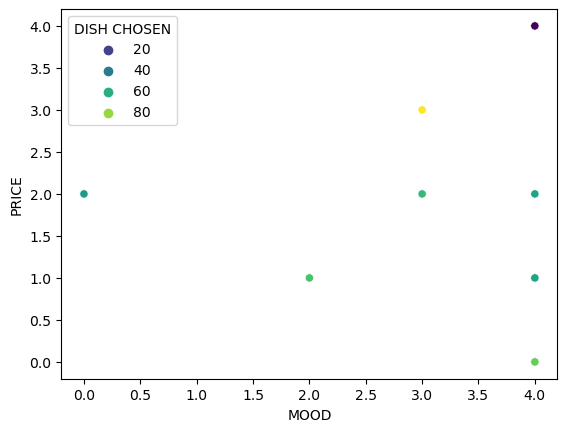

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_knn_clusters(features, labels, knn_model, num_points=10):
    """
    Visualize KNN clusters for recommendations. This example uses the 'MOOD' and 'PRICE' features.
    """
    # Plot only a subset of the data for visualization clarity
    subset_features = features.sample(num_points, random_state=0)
    sns.scatterplot(x=subset_features['MOOD'], y=subset_features['PRICE'], hue=labels.loc[subset_features.index], palette='viridis')
    
    # Plot each point and draw circles to represent the KNN neighborhood
    for _, row in subset_features.iterrows():
        point = row[['MOOD', 'PRICE']].values.reshape(1, -1)
        distances, indices = knn_model.kneighbors(point)
        neighbors = features.iloc[indices[0]]
        
        # Draw circles to show neighbors
        plt.scatter(neighbors['MOOD'], neighbors['PRICE'], color='red', marker='o', s=50)
    
    plt.xlabel('Mood (Encoded)')
    plt.ylabel('Price (Encoded)')
    plt.title('K-Nearest Neighbors Clusters')
    plt.legend()
    plt.show()

# Call the function with features and target
plot_knn_clusters(features, target, knn)


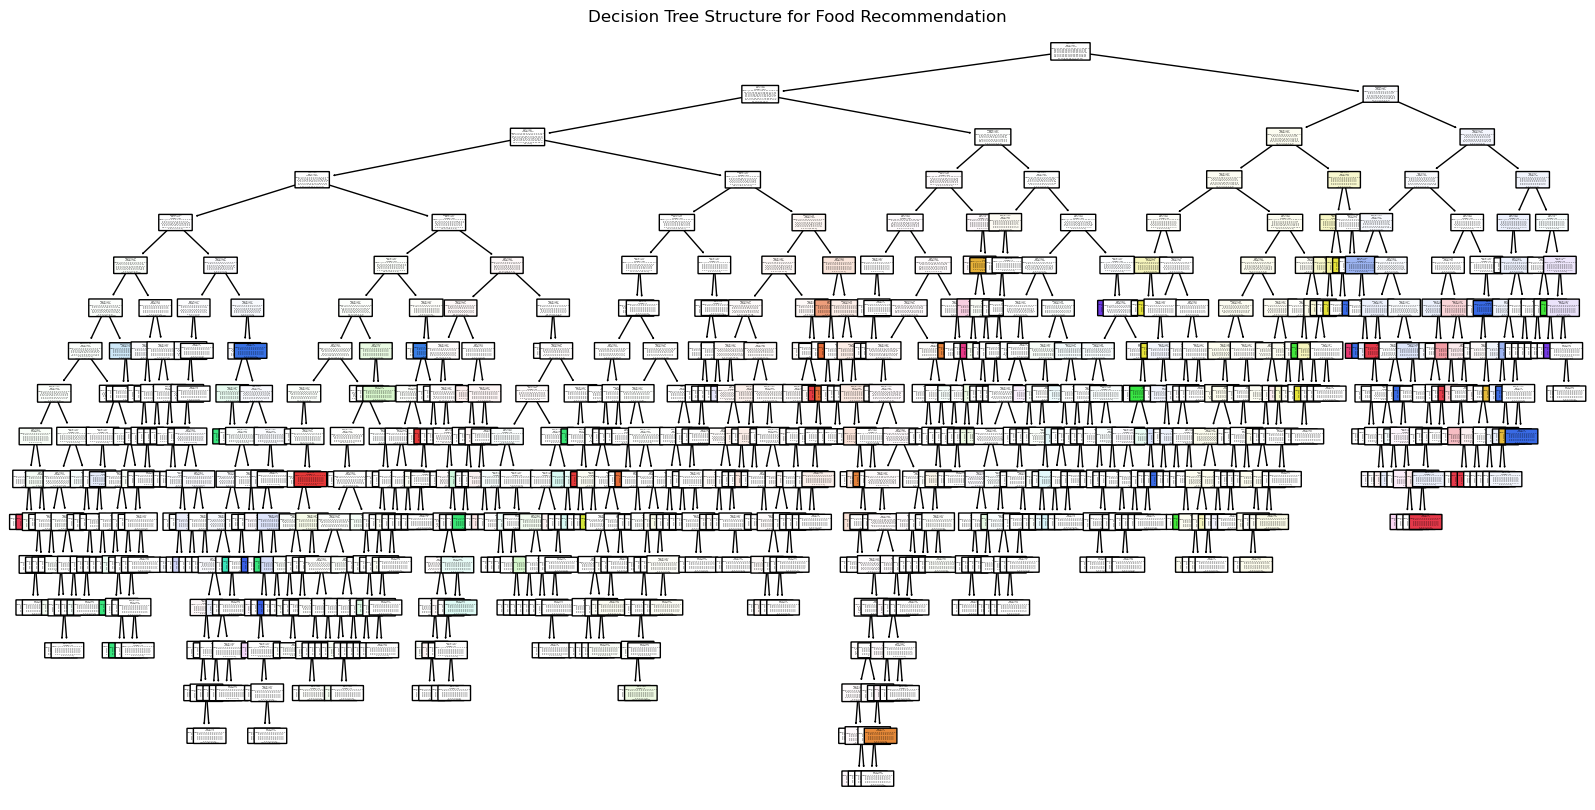

In [17]:
from sklearn.tree import plot_tree

def visualize_decision_tree(dt_model, feature_names, class_names):
    """
    Plot the Decision Tree structure.
    """
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.title("Decision Tree Structure for Food Recommendation")
    plt.show()

feature_names = list(survey_data_normalized_df.columns)  

# Define class names
class_names = list(label_encoders['DISH CHOSEN'].classes_)  # Ensure 'DISH CHOSEN' is the correct target column

# Now call the function
visualize_decision_tree(dt_classifier, feature_names, class_names)

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV
knn_grid = GridSearchCV(NearestNeighbors(), knn_params, cv=5, scoring='accuracy')  # Note: NearestNeighbors is unsupervised

# Since NearestNeighbors is unsupervised, KNN for classification is better suited with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_classifier, knn_params, cv=5, scoring='accuracy')

# Fit GridSearchCV
knn_grid.fit(features, target)

print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN Accuracy:", knn_grid.best_score_)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best KNN Accuracy: 0.0492952851087045


In [19]:
# Define parameter grid for Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')

# Fit GridSearchCV
dt_grid.fit(features, target)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree Accuracy:", dt_grid.best_score_)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Decision Tree Accuracy: 0.0654495018489554


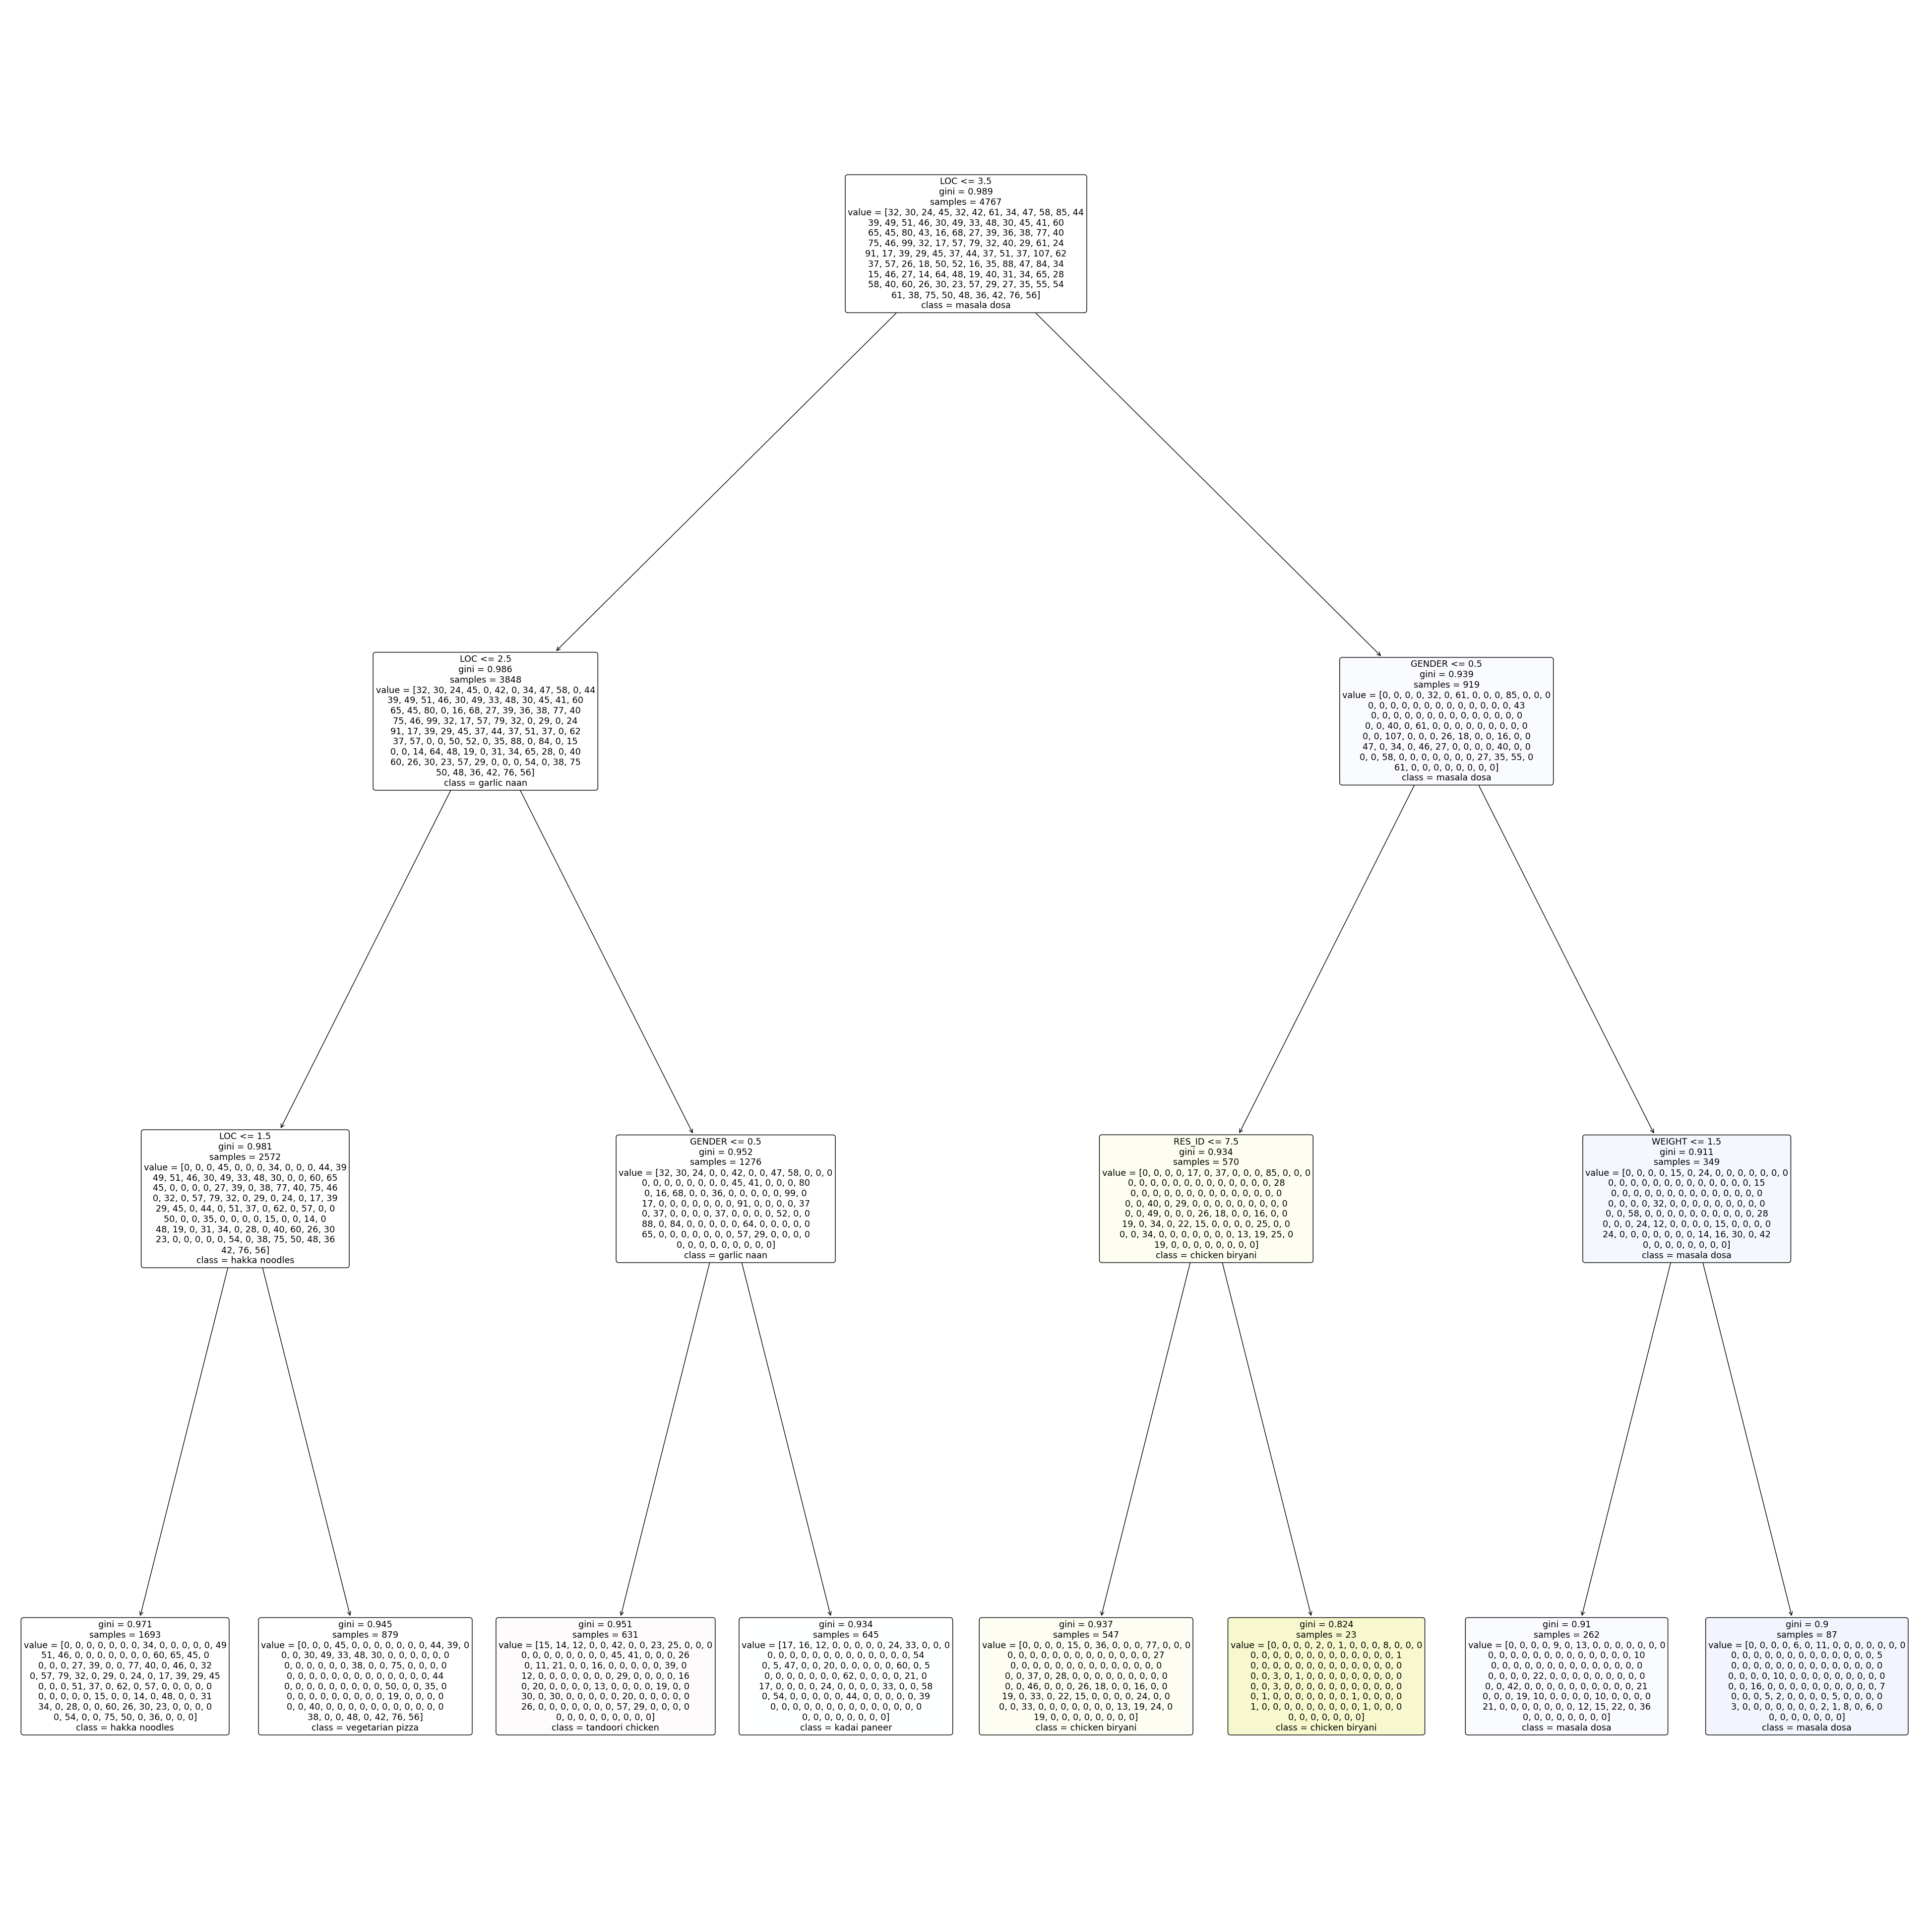

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a simpler decision tree by limiting depth
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_classifier.fit(features, target)  # Ensure X_train, y_train are defined

# Plot the simplified tree
plt.figure(figsize=(50, 50))
plot_tree(dt_classifier, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()
